In [ ]:
# Things move fast
# Old:
with tokenizer.as_target_tokenizer():
  targets = tokenizer(fr_sentence)

# New:
targets = tokenizer(text_targets=es_sentence)

In [2]:
# sentencepiece is req. for the tokenizer to work
!pip install transformers datasets sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
#
from datasets import load_dataset
# possible language pairs: https://opus.nlpl.eu/KDE4.php
data = load_dataset("kde4", lang1="en", lang2="sv")
data

Generating train split: 0 examples [00:00, ? examples/s]

Dataset kde4 downloaded and prepared to /root/.cache/huggingface/datasets/kde4/en-sv-lang1=en,lang2=sv/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 232485
    })
})

In [4]:
# make the dataset managable
small = data["train"].shuffle(seed=42).select(range(1_000))

In [5]:
# split the dataset into train and test
split = small.train_test_split(seed=42)

In [6]:
# print out one sample from the dataset
split["train"][0]

{'id': '95084', 'translation': {'en': 'Download', 'sv': 'Ladda ner'}}

In [20]:
# load up the tokenizer object
from transformers import AutoTokenizer

checkpoint = "Helsinki-NLP/opus-mt-en-sv"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [21]:
# print out anexample sentence pair
en = split['train'][5]['translation']['en']
sv = split['train'][5]['translation']['sv']

en, sv

('with this Polygonal', 'med den här polygonformen')

In [35]:
# tokenize the input sentence
inputs = tokenizer(en)
inputs

{'input_ids': [44, 56, 12284, 5844, 314, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [23]:
# tokenize the target sentence
with tokenizer.as_target_tokenizer():
  targets = tokenizer(sv)
targets

{'input_ids': [30, 35, 93, 4721, 5844, 30212, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [36]:
# look at the tokens for the target
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁med', '▁den', '▁här', '▁poly', 'gon', 'formen', '</s>']

In [25]:
# wrong language, this loks alot differnt from the above(the english tokenizer does not know swedish words), correct example
bad_targets = tokenizer(sv)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁med', '▁den', '▁h', 'är', '▁poly', 'gon', 'for', 'men', '</s>']

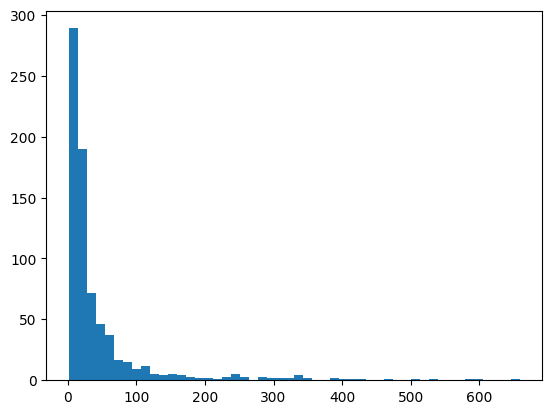

In [26]:
# draw a histogram of the inputs and targets
import matplotlib.pyplot as plt

train = split['train']['translation']
input_lens = [len(tr['en']) for tr in train]

plt.hist(input_lens, bins=50);

(array([202., 208., 108.,  59.,  42.,  24.,  14.,  14.,  10.,  11.,   2.,
          4.,   3.,   3.,   7.,   0.,   4.,   5.,   2.,   1.,   0.,   4.,
          2.,   3.,   3.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,   1.,
          1.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  14.62,  28.24,  41.86,  55.48,  69.1 ,  82.72,  96.34,
        109.96, 123.58, 137.2 , 150.82, 164.44, 178.06, 191.68, 205.3 ,
        218.92, 232.54, 246.16, 259.78, 273.4 , 287.02, 300.64, 314.26,
        327.88, 341.5 , 355.12, 368.74, 382.36, 395.98, 409.6 , 423.22,
        436.84, 450.46, 464.08, 477.7 , 491.32, 504.94, 518.56, 532.18,
        545.8 , 559.42, 573.04, 586.66, 600.28, 613.9 , 627.52, 641.14,
        654.76, 668.38, 682.  ]),
 <BarContainer object of 50 artists>)

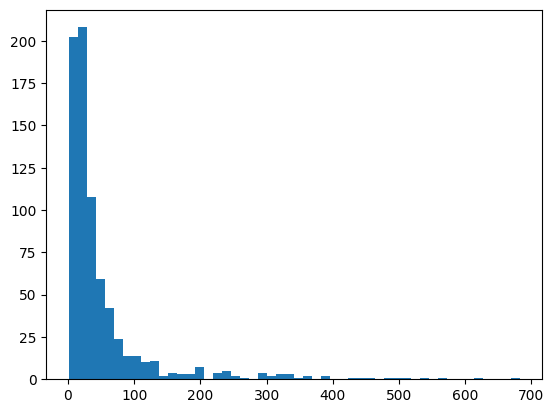

In [37]:
# draw a histogram of the target
target_lens = [len(tr['sv']) for tr in train]
plt.hist(target_lens, bins = 50)

In [28]:
# ser maximun sequence lenght
max_input_len = 128
max_target_len = 128

In [38]:
# tokenizer function
def tokenizer_fn(batch):
  inputs = [x['en'] for x in batch['translation']]
  targets = [x['sv'] for x in batch['translation']]

  tokenized_inputs = tokenizer(
      inputs, max_length=max_input_len, truncation=True
  )
  with tokenizer.as_target_tokenizer():
    tokenized_targets = tokenizer(
        targets, max_length=max_target_len, truncation=True
    )
    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    return tokenized_inputs

In [40]:
# map the tokenizer function to the dataset dict and remove the original columns
tokenized_datasets = split.map(
    tokenizer_fn,
    batched=True, #batch_size=1, num_proc=2,
    remove_columns=split['train'].column_names,
)

Map:   0%|          | 0/750 [00:00<?, ? examples/s]

In [41]:
# load up our prerained model
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)

In [42]:
# create our datacollator
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [43]:
# test out our data collator, outputs a dict of lists
[tokenized_datasets["train"][i] for i in range(1, 3)]

[{'input_ids': [92,
   81,
   2652,
   47,
   1350,
   893,
   20807,
   20372,
   21929,
   57,
   26580,
   42402,
   21929,
   6,
   68,
   2,
   0],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'labels': [140,
   61,
   2586,
   2741,
   35,
   30,
   41186,
   12227,
   7613,
   60,
   31128,
   22835,
   7613,
   2,
   68,
   0]},
 {'input_ids': [6249, 0], 'attention_mask': [1, 1], 'labels': [25235, 0]}]

In [44]:
# test the dataCollator on the above inputs
batch = data_collator([tokenized_datasets['train'][i] for i in range(1, 3)])
batch.keys()

dict_keys(['input_ids', 'attention_mask', 'labels', 'decoder_input_ids'])

In [45]:
# print out the labels
batch["labels"]

tensor([[  140,    61,  2586,  2741,    35,    30, 41186, 12227,  7613,    60,
         31128, 22835,  7613,     2,    68,     0],
        [25235,     0,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100]])

In [46]:
# think of seq2seq RNN's - the decoder RNN must have "some" input
# it's just like a language model where we predict the next word from
# previous words!
batch['decoder_input_ids']

tensor([[56433,   140,    61,  2586,  2741,    35,    30, 41186, 12227,  7613,
            60, 31128, 22835,  7613,     2,    68],
        [56433, 25235,     0, 56433, 56433, 56433, 56433, 56433, 56433, 56433,
         56433, 56433, 56433, 56433, 56433, 56433]])

In [47]:
# the first token is a pad!
tokenizer.convert_ids_to_tokens(batch["decoder_input_ids"][0])

['<pad>',
 '▁Du',
 '▁kan',
 '▁antingen',
 '▁nå',
 '▁den',
 '▁med',
 '▁Brev',
 '▁Skapa',
 '▁filter',
 '▁eller',
 '▁Inställningar',
 '▁Anpassa',
 '▁filter',
 '.',
 '...']

In [48]:
# the labels are one step ahead - just like a language model
tokenizer.convert_ids_to_tokens(batch["labels"][0])

['▁Du',
 '▁kan',
 '▁antingen',
 '▁nå',
 '▁den',
 '▁med',
 '▁Brev',
 '▁Skapa',
 '▁filter',
 '▁eller',
 '▁Inställningar',
 '▁Anpassa',
 '▁filter',
 '.',
 '...',
 '</s>']

In [49]:
# print out the real sample itself
split['train'][1]

{'id': '49716',
 'translation': {'en': 'You can reach it either via Message Create Filter or Settings Configure Filters....',
  'sv': 'Du kan antingen nå den med Brev Skapa filter eller Inställningar Anpassa filter....'}}

In [50]:
# install metrics we need
!pip install sacrebleu bert-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.4 MB/s eta 0:00:00


In [51]:
# import function ad load up our two metrics
from datasets import load_metric
bleu_metric = load_metric("sacrebleu")
bert_metric = load_metric("bertscore")

<ipython-input-51-c93ad002457b>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


In [54]:
# targets must be in a list - as you recall, for bleu there can be multiple
# acceptable reference translations
bleu_metric.compute(predictions=["I love bumblebees"], references=[["I love bumblebees"]])

{'score': 0.0,
 'counts': [3, 2, 1, 0],
 'totals': [3, 2, 1, 0],
 'precisions': [100.0, 100.0, 100.0, 0.0],
 'bp': 1.0,
 'sys_len': 3,
 'ref_len': 3}

In [55]:
# Above gives 0 because it's not good on short sentences
s = "Marian is an efficient NMT framework written in pure C++"
bleu_metric.compute(predictions=[s], references=[[s]])

{'score': 100.00000000000004,
 'counts': [12, 11, 10, 9],
 'totals': [12, 11, 10, 9],
 'precisions': [100.0, 100.0, 100.0, 100.0],
 'bp': 1.0,
 'sys_len': 12,
 'ref_len': 12}

In [56]:
# compare two almost similar scentences with bert, 98% it's understand meaning and not jjust try to match words
bert_metric.compute(
    predictions=["I love bumblebees"], references=[["I like bumblebees"]], lang='en')


{'precision': [0.9803113341331482],
 'recall': [0.9803113341331482],
 'f1': [0.9803113341331482],
 'hashcode': 'roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.29.1)'}

In [57]:
# define our own compute metrics function
import numpy as np

def compute_metrics(preds_and_labels):
  # preds are not logits, but token ids
  preds, labels = preds_and_labels

  # convert predictions into words
  decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

  # for any -100 label, replace with pad token id
  labels = np.where(labels != -100, labels, tokenizer.pad_token_id)

  # convert labels into words
  decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

  # get rid of extraneous whitespace
  # and also, put targets into lists
  decoded_preds = [pred.strip() for pred in decoded_preds]
  decoded_labels = [[label.strip()] for label in decoded_labels]

  bleu = bleu_metric.compute(
      predictions=decoded_preds, references=decoded_labels
  )
  bert_score = bert_metric.compute(
      predictions=decoded_preds, refernces=decoded_labels, lang='sv'
  )
  return {"bleu": bleu["score"], 'bert_score':np.mean(bert_score['f1'])}

In [ ]:
#
from ransformers import Seq2SeqTrainningArgumnets